In [1]:
import json
import sys
sys.path.append("../")

import cv2
import matplotlib.pyplot as plt

from utils.efficientdet.dataset import EfficientDetDataModule

%load_ext autoreload
%autoreload 2


/home/innerve/micromamba/envs/folcon/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
EFFICIENTDET_MODELS_DIR = "/mnt/folcon/03_model_weights/efficientdet"
MODEL_NAME = "efficientdet"
PATCH_SIZE = 768
TRAIN_VAL_SLIDES_DIR = "/mnt/folcon/02_model_input/annotations/data_split.json"
PATCHES_PATH = "/mnt/folcon/02_model_input/patches"
TRAINING_EXAMPLES_PATH = "/mnt/folcon/02_model_input/annotations/train_val_annotations.json"
MODEL_PARAMS = {
    "learning_rate": 0.0001,
    "prediction_confidence_threshold": 0.5,
    "wbf_iou_threshold": 0.3,
    "model_architecture": "tf_efficientdet_d2",
    "num_workers": 4,
    "batch_size": 4,
    "max_epochs": 100
}
DEVICE = "gpu"

In [3]:
with open(TRAINING_EXAMPLES_PATH, "r") as f:
    train_val_annotations = json.load(f)
with open(TRAIN_VAL_SLIDES_DIR, "r") as f:
    slides = json.load(f)
train_slides = slides["train"]
val_slides = slides["val"]

In [4]:
dm = EfficientDetDataModule(annotations=train_val_annotations,
                            patches_path=PATCHES_PATH,
                            training_slides=train_slides,
                            validation_slides=val_slides,
                            img_size=PATCH_SIZE,
                            num_workers=MODEL_PARAMS["num_workers"],
                            batch_size=MODEL_PARAMS["batch_size"])

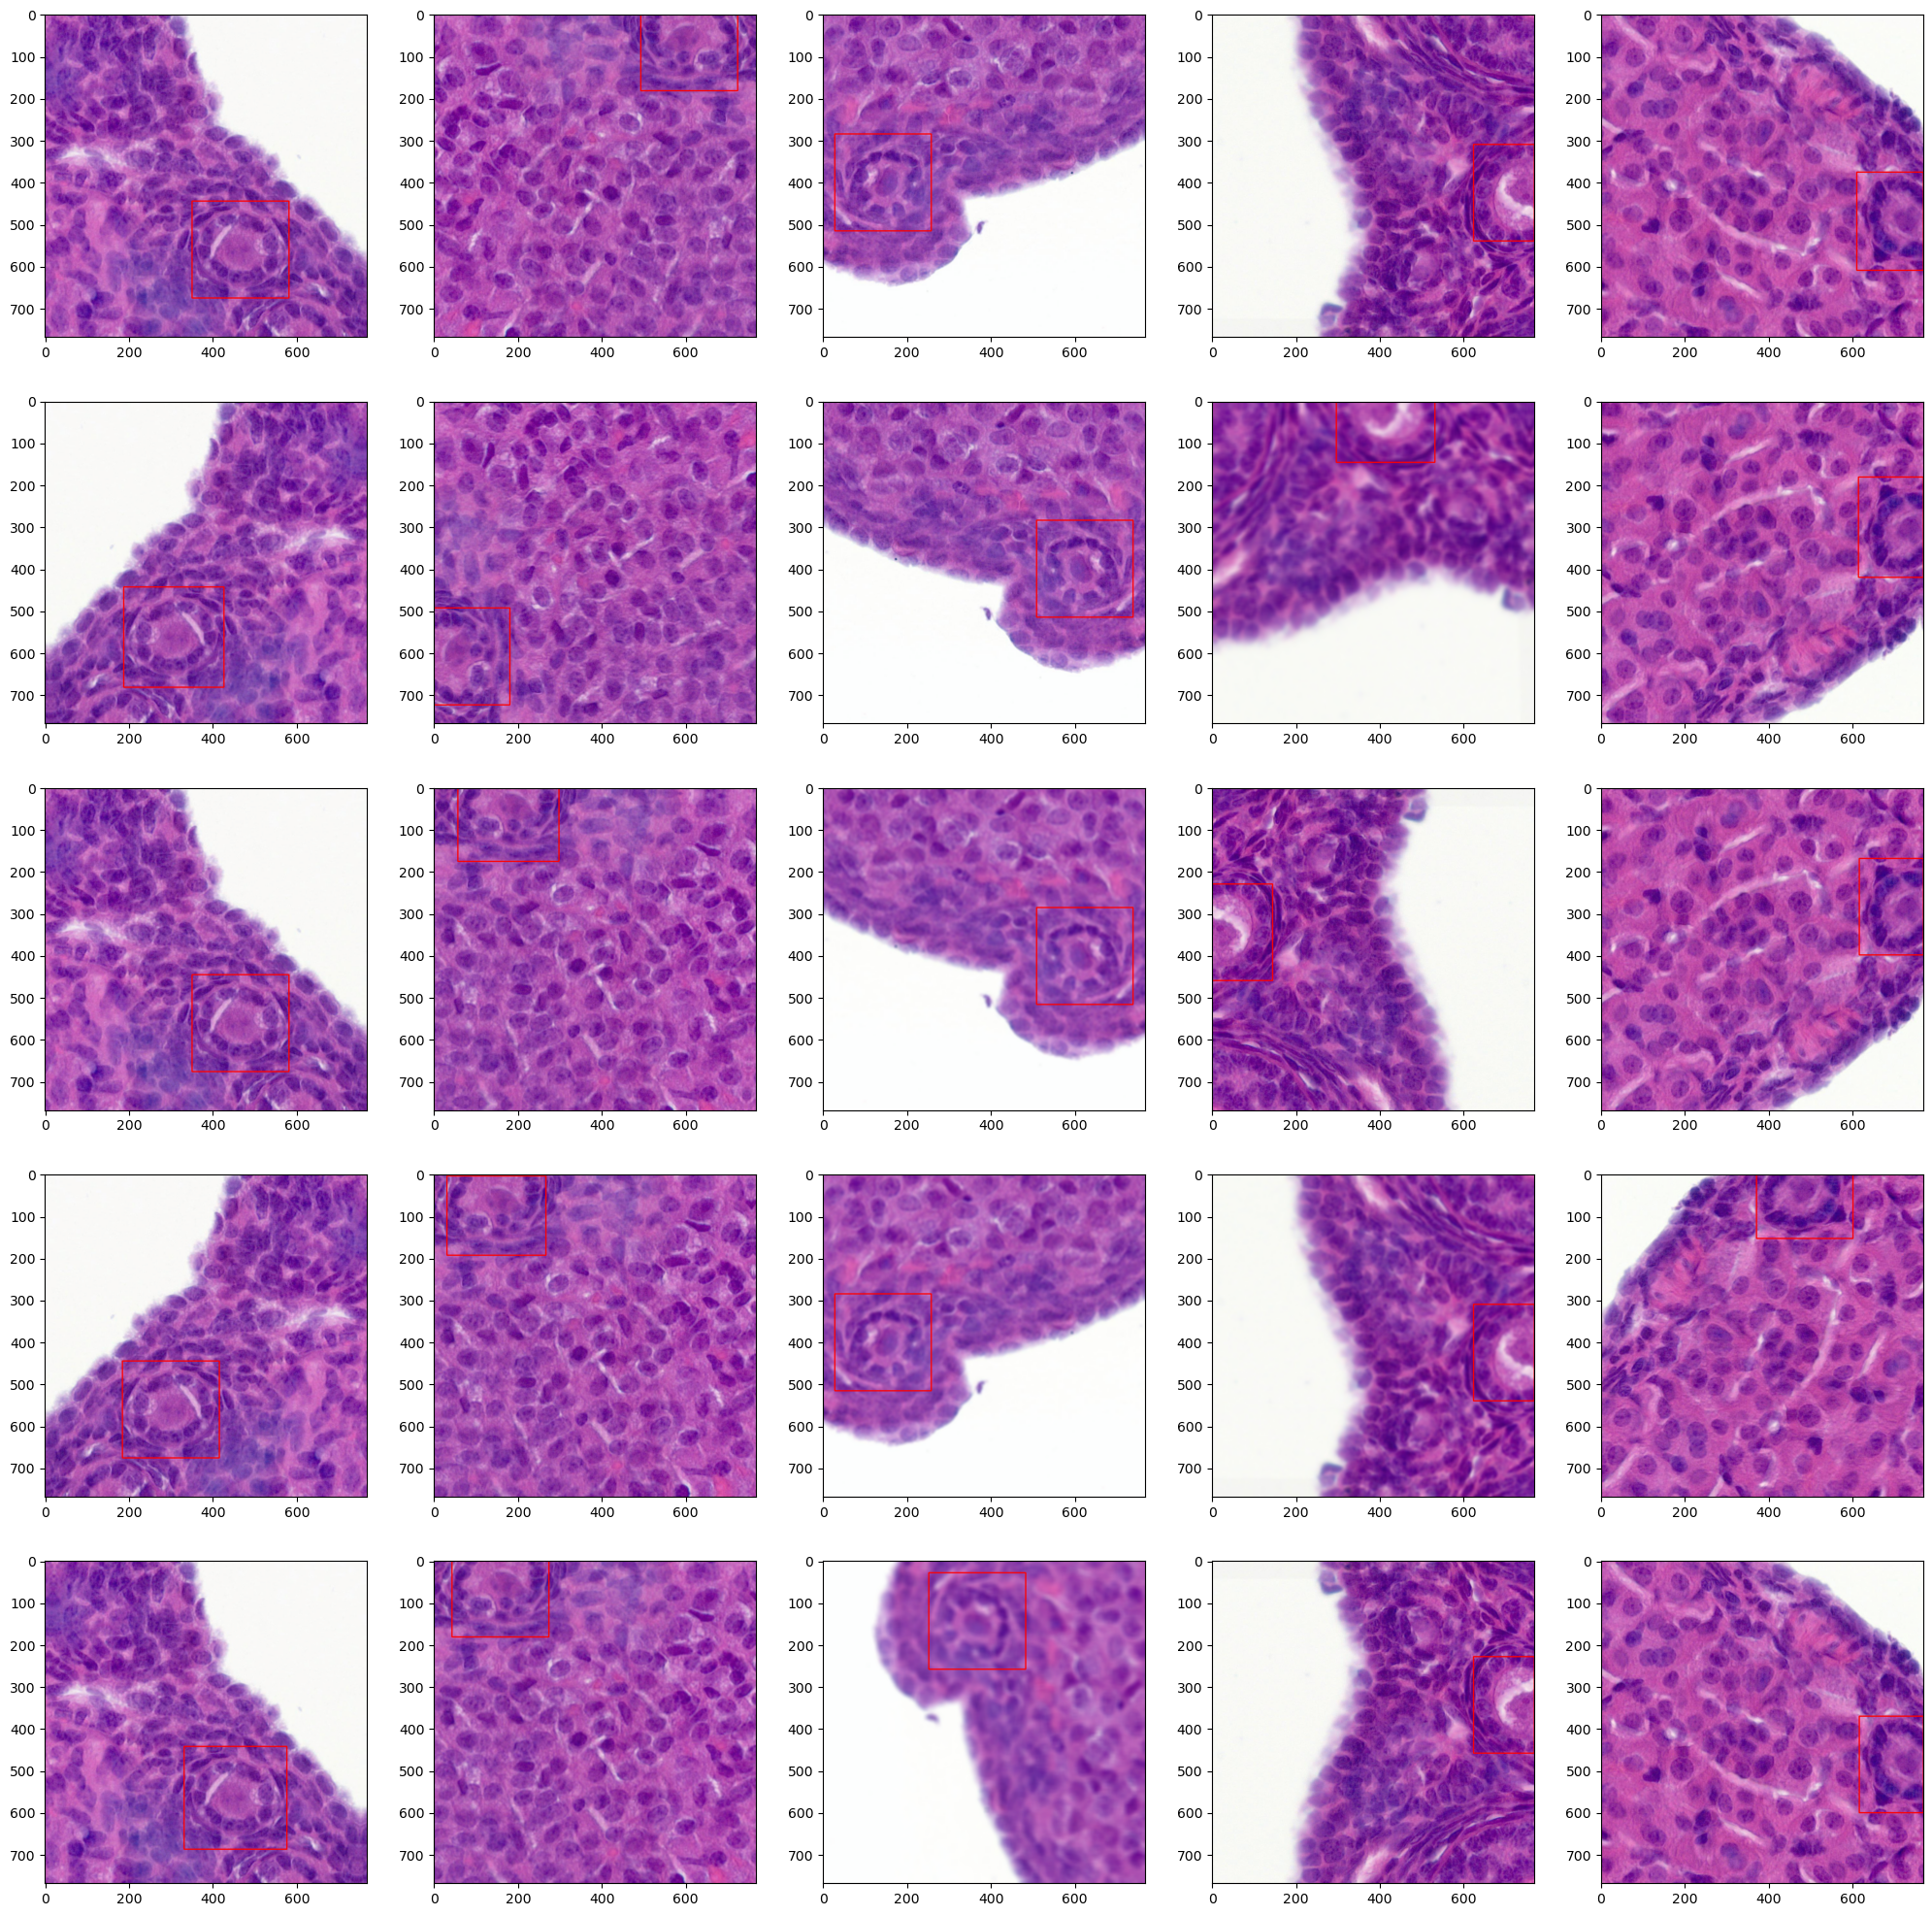

In [24]:
ncols = 5
nrows = 5
size = 5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*size, nrows*size))
c = 1

for row in range(nrows):
    for col, i in enumerate(dm.train_dataset()):
        if col >= ncols:
            break
        img, target, image_id = i
        img = img.permute(1, 2, 0).numpy() * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        img = (img * 255).astype("uint8")
        target = target["bboxes"].numpy()
        for j in target:
            ymin, xmin, ymax, xmax = j
            img = cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 0, 0), 2)
        ax[row, col].imshow(img)
        c += 1
    if row >= nrows:
        break
    
